In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
df = pd.read_csv("portlandhousing.txt")

In [33]:
df.columns = ['Size','bedroom','Price']

In [34]:
Port_housing = df

In [35]:
Port_housing.head()

,Size,bedroom,Price
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


In [36]:
Port_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
Size       46 non-null int64
bedroom    46 non-null int64
Price      46 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [37]:
Port_housing.describe()

,Size,bedroom,Price
count,46.000000,46.000000,46.000000
mean,1998.434783,3.173913,339119.456522
std,803.333019,0.768963,126103.418369
min,852.000000,1.000000,169900.000000
25%,1429.500000,3.000000,249900.000000
50%,1870.000000,3.000000,299900.000000
75%,2284.500000,4.000000,368875.000000
max,4478.000000,5.000000,699900.000000


In [38]:
Port_housing.columns

Index(['Size', 'bedroom', 'Price'], dtype='object')

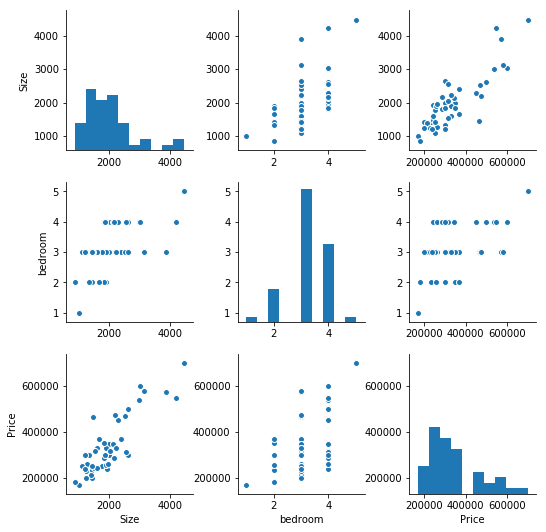

In [39]:
sns.pairplot(Port_housing)

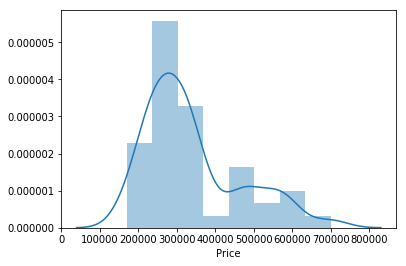

In [40]:
sns.distplot(Port_housing['Price'])

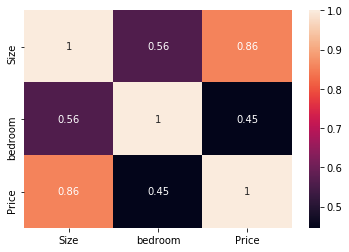

In [42]:
sns.heatmap(Port_housing.corr(), annot =True)

# Prediction

In [43]:
Port_housing.columns

Index(['Size', 'bedroom', 'Price'], dtype='object')

In [46]:
X = Port_housing[['Size', 'bedroom']]

In [47]:
y = Port_housing['Price']

In [48]:
from sklearn.cross_validation import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [64]:
# training model

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lm = LinearRegression()

In [67]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
print(lm.intercept_)

117918.113767


In [69]:
lm.coef_

array([   140.15351479, -15406.68625537])

In [70]:
X_train.columns

Index(['Size', 'bedroom'], dtype='object')

In [71]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=["coeff"])

In [78]:
cdf

,coeff
Size,140.153515
bedroom,-15406.686255


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Size** is associated with an **increase of 145.30 **.
- Holding all other features fixed, a 1 unit increase in **bedroom** is associated with an **decrease of -11812.03 **.

In [79]:
predictions = lm.predict(X_test)

In [80]:
predictions

array([ 240302.73328876,  265109.90540592,  441282.87349226,
        244927.7992767 ,  281087.40609156,  295943.6786589 ,
        355098.66226982,  334496.09559624,  344847.05494819,
        242664.94229789,  511359.63088539,  416065.44120185,
        351714.57717272,  286693.54668301])

In [83]:
y_test.head()

45    239500
7     212000
28    299900
16    199900
8     242500
Name: Price, dtype: int64

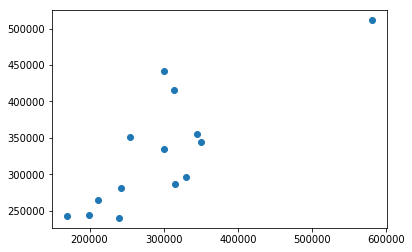

In [84]:
plt.scatter(y_test, predictions)

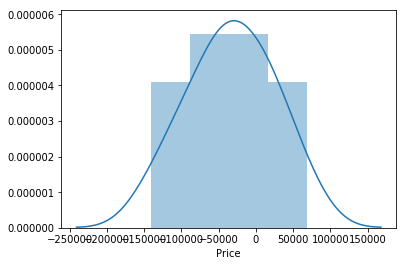

In [87]:
sns.distplot(y_test - predictions)

In [88]:
from sklearn import metrics

In [89]:
metrics.mean_absolute_error(y_test, predictions)

52207.608922730644

In [90]:
metrics.mean_squared_error(y_test, predictions)

4240252682.104074

In [94]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

311045.27044042991